In [1]:
import pandas as pd
import seaborn as sns
import simulation as sim
import plot as pl
import utilities as u
sns.set_context('talk')
sns.set_style("ticks")

## Figure 3: Thermo-hydrolysis rate

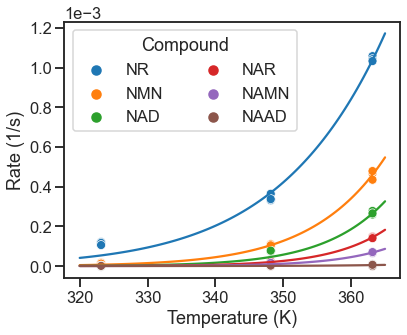

In [2]:
drates = pd.read_csv('../data/arrehnius_parameters.csv', sep='\t')
pl.plot_thermolysis(drates, save=False, figsize=(6,5))

## Figure 4: ATP consumption per NAD production at different temperature

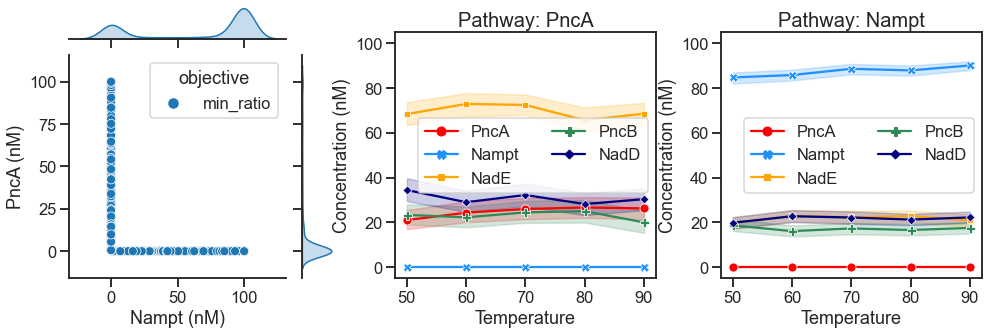

In [3]:
# Figure 4A, 4B and 4C
df_ = u.prepET(filepath_optET='../data/new_PN_Keq_min_ratio_1_123.csv', objective='min_ratio')
scaling = 1e-10 * 1e-3 * 1e9
pl.subplots(df_, scaling=scaling, objective='min_ratio', ylim1=[-5, 105], ylim2=[-5, 105])

In [4]:
# df_ = df_.drop('Sol', axis=1)
# pl.plot_corr(dfP=df_[df_.pathway=='PncA'], dfN=df_[df_.pathway=='Nampt'], filename='../images/corr_optimisedET_min_ratio.png')

In [5]:
F = pd.read_csv('../data/new_Flux_min_ratio.csv', sep='\t', index_col=0)
F = sim.calculateATPconsFlux(F).reset_index()
F.pathway = F.pathway.replace({'NAMPT': 'Nampt', 'PNCA': 'PncA'})
cols = ['PNCA', 'NAPRT', 'NMNAT1-NaMN', 'NADS', 'SIRT', 'NAMPT', 'NMNAT1-NMN',
        'NT5-NaMN', 'NT5-NMN', 'NRK1-NMN', 'PNP-NR', 'NRK1-NaMN', 'PNP-NAR',
        'NMN thermolysis', 'NaMN thermolysis', 'NAR thermolysis',
        'NR thermolysis', 'NAD thermolysis', 'ATP consumption', 'NAD production', 'ATPconsNADprod',
        'pathway', 'objective']

# Figure 5

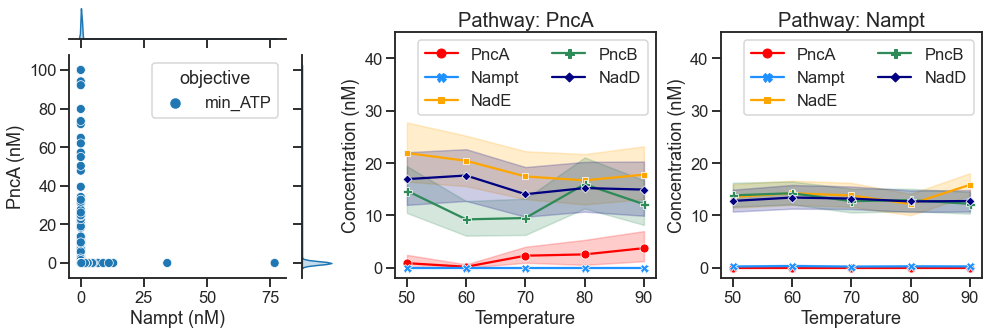

In [7]:
# Figure 5A, 4B and 4C
df_ = u.prepET(filepath_optET='../data/new_PN_Keq_min_ATP_1.csv', objective='min_ATP')
scaling = 1e-10 * 1e-3 * 1e9
pl.subplots(df_, scaling=scaling, objective='min_ATP', ylim1=[-2, 45], ylim2=[-2, 45])

In [8]:
# df_ = df_.drop('Sol', axis=1)
# pl.plot_corr(dfP=df_[df_.pathway=='PncA'], dfN=df_[df_.pathway=='Nampt'], filename='../images/corr_optimisedET_min_ATP.png')

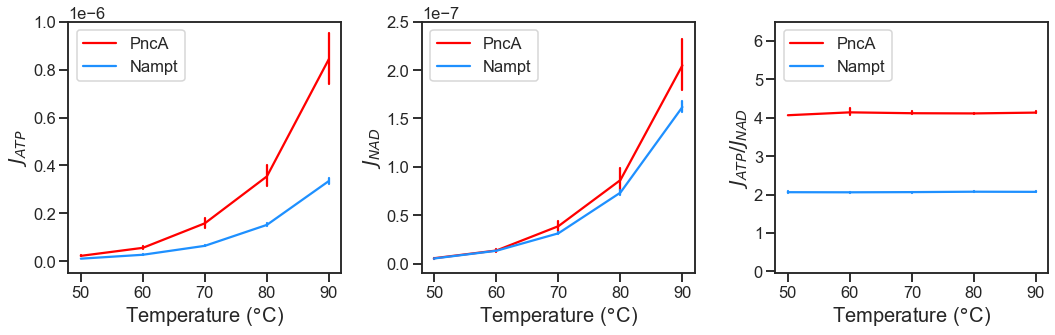

In [2]:
# Figure 5D, 5E and 5F
F = pd.read_csv('../data/new_Flux_min_ATP_1.csv', sep='\t', index_col=0)
pl.subplot_fluxes(F, ylim1=[-5e-8, 1e-6], ylim2=[-1e-8, 2.5e-7], ylim3=[-0.05, 6.5])

# Figure 6

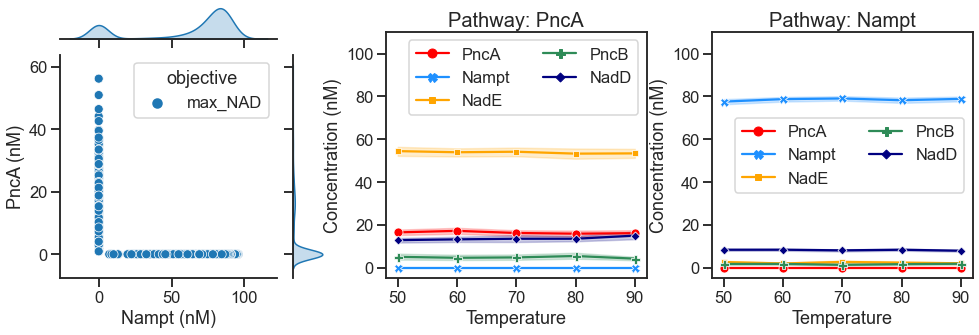

In [10]:
# Figure 6A, 4B and 4C
df_ = u.prepET(filepath_optET='../data/new_PN_Keq_max_NAD_1.csv',
               objective='max_NAD')
scaling = 1e-10 * 1e-3 * 1e9
pl.subplots(df_, scaling=scaling, objective='max_NAD',
            ylim1=[-5, 110], ylim2=[-5, 110])

In [11]:
# df_ = df_.drop('Sol', axis=1)
# pl.plot_corr(dfP=df_[df_.pathway=='PncA'], dfN=df_[df_.pathway=='Nampt'], filename='../images/corr_optimisedET_max_NAD.png')

In [45]:
import matplotlib.pyplot as plt
def subplot_fluxes(F, save=False, filename='', **kwargs):
    F = sim.calculateATPconsFlux(F).reset_index()
    F.pathway = F.pathway.replace({'NAMPT': 'Nampt', 'PNCA': 'PncA'})

    y = ['ATP consumption', 'NAD production', 'ATPconsNADprod']
    y_label = ['$J_{ATP}$', '$J_{NAD}$', '$J_{ATP}/J_{NAD}$']
    y_lim = [kwargs.get('ylim1', [-5e-6, 2e-4]), kwargs.get('ylim2', [-1e-6, 5e-5]),
             kwargs.get('ylim3', [-2e-1, 6.5])]

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for i, ax in enumerate(ax.flat):
        ax2 = ax.twinx()
        # # Using set_dashes() to modify dashing of an existing line
        # line1, = ax.plot(F[F.pathway == 'PncA'].temperature, y[i])
        # line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

        # # Using plot(..., dashes=...) to set the dashing when creating a line
        # line2, = ax.plot(F[F.pathway == 'Nampt'].temperature, y[i], dashes=[6, 2], label='Using the dashes parameter')
        lp = sns.lineplot(data=F[F.pathway == 'PncA'], x=F[F.pathway == 'PncA'].temperature, y=y[i],
                     ax=ax, err_style='bars', label='PncA', color='#FF0000')
        lp.lines[0].set_linestyle('dashed')
        lp = sns.lineplot(data=F[F.pathway == 'Nampt'], x=F[F.pathway == 'Nampt'].temperature, y=y[i],
                     ax=ax2, err_style='bars', alpha=0.7, label='Nampt', color='#1E90FF', dashes=[(2, 2), (2, 2)])
        # lp.lines[1].set_linestyle('dashdot')
        # sns.lineplot(data=F, x=F.temperature, y=y[i], hue='pathway', hue_order=['PncA', 'Nampt'],
        #              palette=['#FF0000', '#1E90FF'], ax=ax, err_style='bars', dashes=True)
        ax.set_ylabel(y_label[i], fontsize=20)
        ax.set_xlabel('Temperature ($\degree$C)', fontsize=20)
        ax.ticklabel_format(style='scientific', axis='y', scilimits=(-3, 6))
        ax.set_ylim(y_lim[i])
        ax.legend(loc='upper left')
    plt.tight_layout()
    if save == True:
        fig.savefig(filename, dpi=300)
    return plt.show()


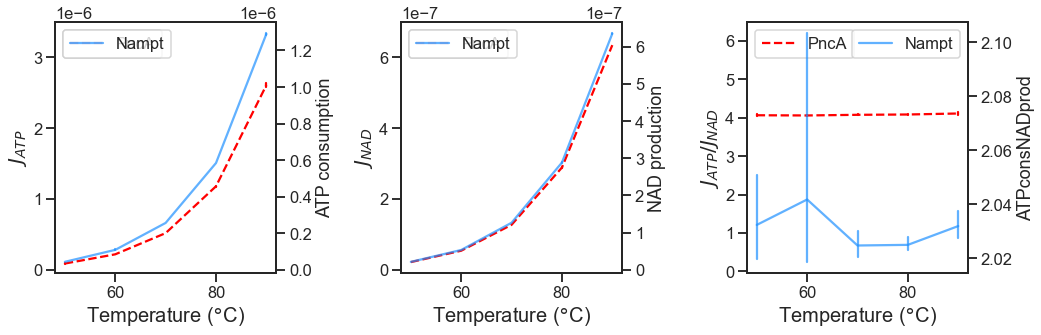

In [46]:
# Figure 6D, 6E and 6F
F = pd.read_csv('../data/fluxes_max_NAD_1.csv', sep='\t', index_col=0)
subplot_fluxes(F, ylim1=[-5e-8, 3.5e-6], ylim2=[-1e-8, 7e-7], ylim3=[-0.05, 6.5])


# Figure S1

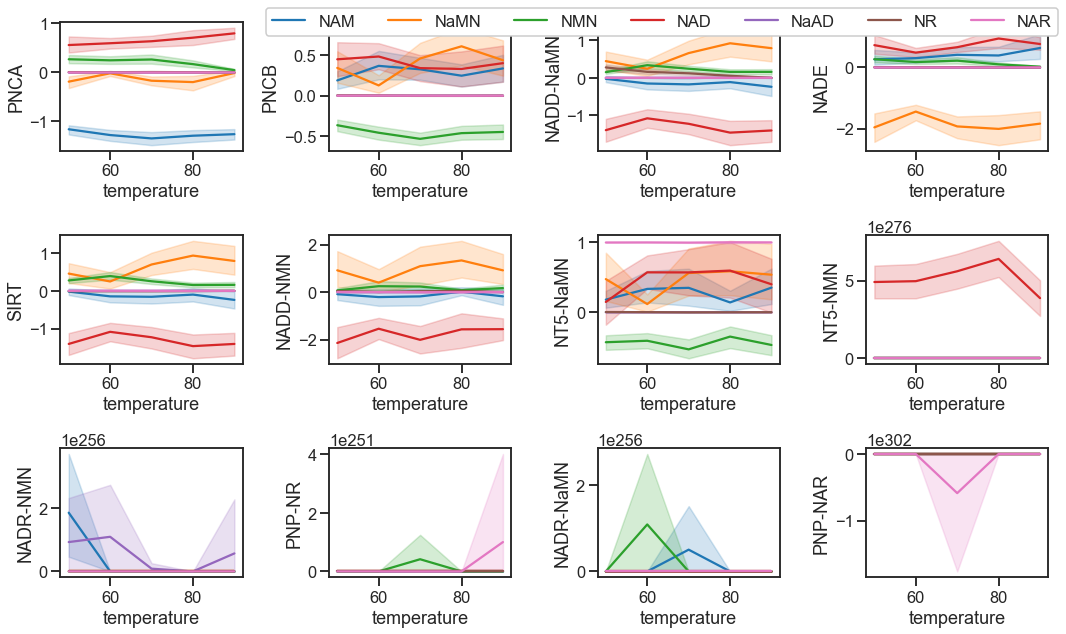

In [2]:
CC_PNCA = pd.read_csv('../data/CC_PNCA.csv', sep='\t', index_col=0)
pl.controlcoefficients(CC=CC_PNCA.drop('NAMPT', axis=1))


# Figure S2

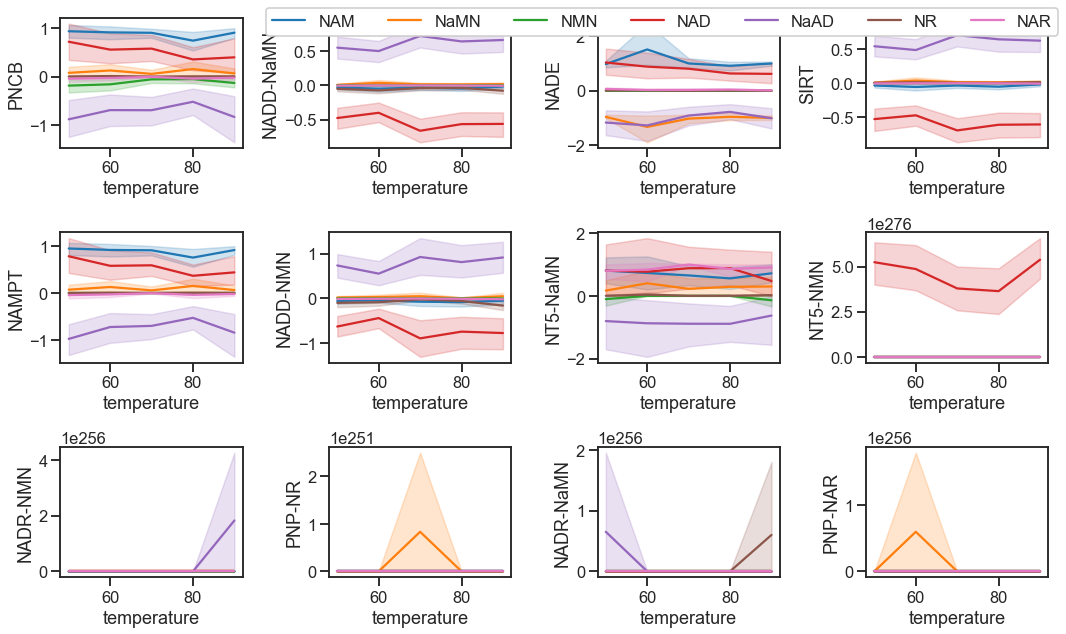

In [3]:
CC_PNCA = pd.read_csv('../data/CC_NAMPT.csv', sep='\t', index_col=0)
pl.controlcoefficients(CC=CC_PNCA.drop('PNCA', axis=1))

# Figure S3

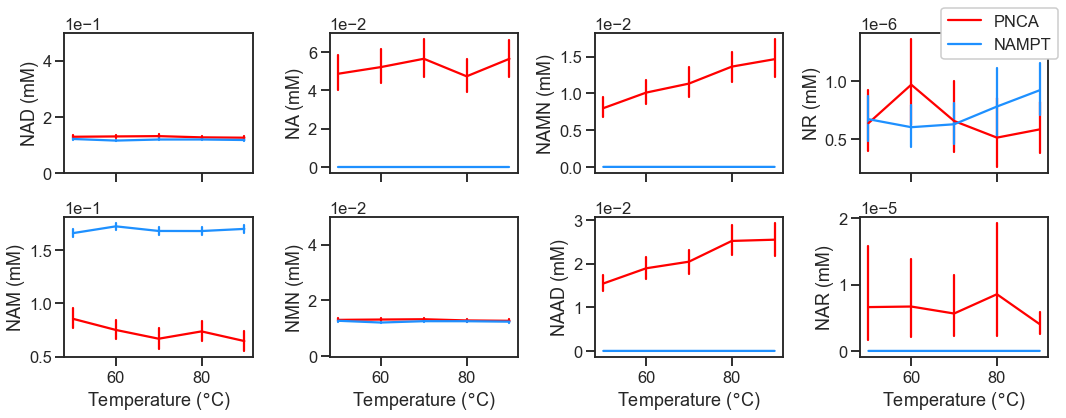

In [36]:
# Figure S3(A)
C = pd.read_csv('../data/new_Conc_min_ratio_1_123.csv', sep='\t')
C = C.rename(columns={'NaMN': 'NAMN', 'NaAD': 'NAAD'})
mets = ['NAD', 'NA', 'NAMN', 'NR', 'NAM', 'NMN', 'NAAD', 'NAR']
C = C.rename(columns={i: i+' (mM)' for i in mets})
pl.subplots_concentration(df=sim.u.dropConstantCol(C), layout=(2, 4), figsize=(15, 6),
                          hue='pathway', sharex=True)

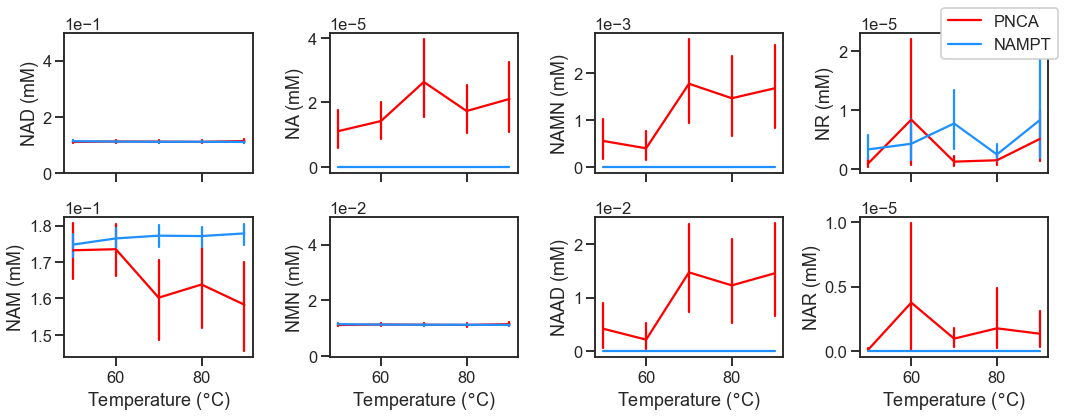

In [31]:
# Figure S3(B)
C = pd.read_csv('../data/new_Conc_min_ATP_1.csv', sep='\t', index_col=0)
C = C.rename(columns={'NaMN': 'NAMN', 'NaAD': 'NAAD'})
mets = ['NAD', 'NA', 'NAMN', 'NR', 'NAM', 'NMN', 'NAAD', 'NAR', 'pathway']
C = C.rename(columns={i: i+' (mM)' for i in mets[:-1]}).reset_index()
pl.subplots_concentration(df=sim.u.dropConstantCol(C), layout=(2, 4), figsize=(15, 6),
                          hue='pathway', sharex=True)


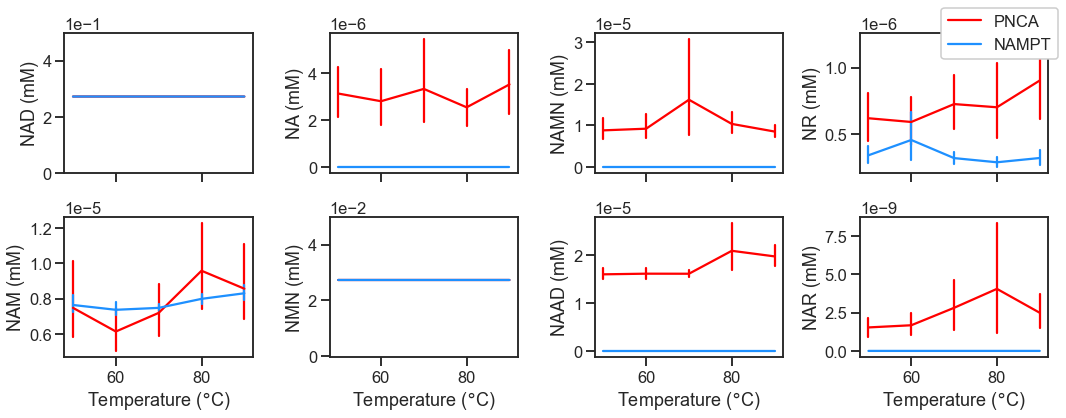

In [23]:
# Figure S3(C)
C = pd.read_csv('../data/concentrations_max_NAD_1.csv', sep='\t', index_col=0)
C = C.rename(columns={'NaMN': 'NAMN', 'NaAD': 'NAAD'})
mets = ['NAD', 'NA', 'NAMN', 'NR', 'NAM', 'NMN', 'NAAD', 'NAR', 'pathway']
C = C.rename(columns={i: i+' (mM)' for i in mets[:-1]})
pl.subplots_concentration(df=sim.u.dropConstantCol(C.reset_index()), layout=(2, 4), figsize=(15, 6),
                          hue='pathway', sharex=True)
